In [ ]:
### Atividade prática relativa ao segunda prova
### Programação - Thiago Maia
### HUGUEMBERG MARIANO

# Fonte: https://github.com/hakube/formula1-dataset

## Analise de Dados da Formula 1 de 1950 a 2020

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns

In [2]:
#Importando o arquivo csv e visualizando as 5 primeiras linhas

df = pd.read_csv("formula1_data_races.csv", sep=";")
df.head(5)

,position,number,driver,car,laps,time,points,grand_prix,year,fastest_lap
0,1,77,Valtteri Bottas BOT,Mercedes,71.0,1:30:55.739,25.0,AUSTRIA,2020,no
1,2,16,Charles Leclerc LEC,Ferrari,71.0,+2.700s,18.0,AUSTRIA,2020,no
2,3,4,Lando Norris NOR,McLaren Renault,71.0,+5.491s,16.0,AUSTRIA,2020,yes
3,4,44,Lewis Hamilton HAM,Mercedes,71.0,+5.689s,12.0,AUSTRIA,2020,no
4,5,55,Carlos Sainz SAI,McLaren Renault,71.0,+8.903s,10.0,AUSTRIA,2020,no


In [3]:
#Verificando o tipo de cada coluna

df.dtypes

position        object
number           int64
driver          object
car             object
laps           float64
time            object
points         float64
grand_prix      object
year             int64
fastest_lap     object
dtype: object

In [4]:
# Filtrando o primeiro colocado de cada corrida a partir do ano de 2014

filtro_p1 = df.position == "1"
filtro_14a20 = df.year >= 2014
dfp1 = df.loc[filtro_p1 & filtro_14a20]
dfp1

,position,number,driver,car,laps,time,points,grand_prix,year,fastest_lap
0,1,77,Valtteri Bottas BOT,Mercedes,71.0,1:30:55.739,25.0,AUSTRIA,2020,no
20,1,44,Lewis Hamilton HAM,Mercedes,71.0,1:22:50.683,25.0,STYRIA,2020,no
40,1,44,Lewis Hamilton HAM,Mercedes,70.0,1:36:12.473,26.0,HUNGARY,2020,yes
60,1,44,Lewis Hamilton HAM,Mercedes,52.0,1:28:01.283,25.0,GREAT BRITAIN,2020,no
80,1,33,Max Verstappen VER,Red Bull Racing Honda,52.0,1:19:41.993,25.0,70TH ANNIVERSARY,2020,no
...,...,...,...,...,...,...,...,...,...,...
2726,1,44,Lewis Hamilton HAM,Mercedes,44.0,1:51:43.021,26.0,JAPAN,2014,yes
2748,1,44,Lewis Hamilton HAM,Mercedes,53.0,1:31:50.744,25.0,RUSSIA,2014,no
2769,1,44,Lewis Hamilton HAM,Mercedes,56.0,1:40:04.785,25.0,UNITED STATES,2014,no
2787,1,6,Nico Rosberg ROS,Mercedes,71.0,1:30:02.555,25.0,BRAZIL,2014,no


In [5]:
# Agrupando o vencedores por piloto, assim temos o total de vitorias dos pilotos na F1

dfp1.groupby(['driver']).position.count().sort_values(ascending=False)

driver
Lewis  Hamilton  HAM      73
Nico  Rosberg  ROS        20
Sebastian  Vettel  VET    14
Max  Verstappen  VER      10
Valtteri  Bottas  BOT      9
Daniel  Ricciardo  RIC     7
Charles  Leclerc  LEC      2
Kimi  Räikkönen  RAI       1
Pierre  Gasly  GAS         1
Sergio  Perez  PER         1
Name: position, dtype: int64

## Fazendo o gráfico

In [6]:
# Estabeleu o tamanho e qual o estilo do gráfico

%matplotlib inline
rcParams['figure.figsize'] = 6,8
sns.set_style('whitegrid')

Text(0, 0.5, 'Pilotos')

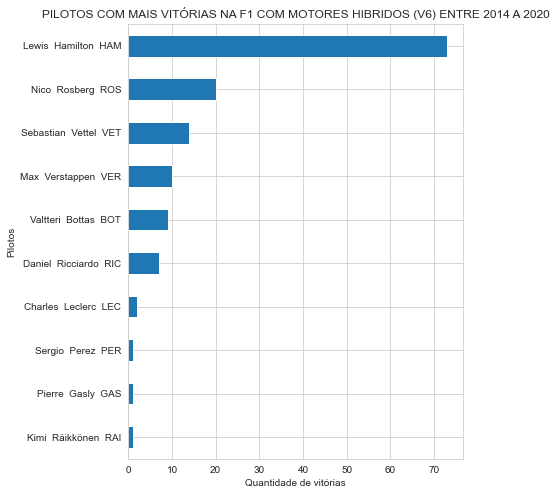

In [7]:
# Informamos qual a posição dos dados no gráfico e fizemos a plotagem dele

dfp1.groupby(['driver']).position.count().sort_values(ascending=True).plot(kind='barh')
plt.title("PILOTOS COM MAIS VITÓRIAS NA F1 COM MOTORES HIBRIDOS (V6) ENTRE 2014 A 2020")
plt.xlabel('Quantidade de vitórias')
plt.ylabel('Pilotos')

In [ ]:
dfp1.groupby(['driver']).position.count().sort_values(ascending=True)

In [ ]:
# Os dados analisados mostram o número de vitórias alcançados pelos pilotos na F1, desde 2014, quando houve a mudança dos
# motores, saindo do antigos V8 para o modelo V6, estes são mais economicos e menos poluentes.
# O Gráfico em questão demostra ainda um domínio no período do piloto Lewis Hamilton, chegando a ter mais de 50% de vitorias
# nas corridas disputadas.